In [14]:
import pandas

In [16]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
from urllib.request import urlretrieve
iris='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
dataset=pandas.read_csv(iris,sep=',')

In [18]:
attributes=["sepal_length","sepal_width","petal_length","petal_width","class"]
dataset.columns=attributes

In [19]:
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [20]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
84,6.0,3.4,4.5,1.6,Iris-versicolor
44,4.8,3.0,1.4,0.3,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
64,6.7,3.1,4.4,1.4,Iris-versicolor
110,6.4,2.7,5.3,1.9,Iris-virginica


In [24]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

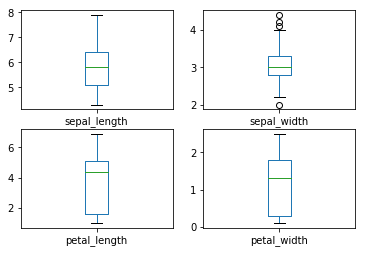

In [25]:
# visualization box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

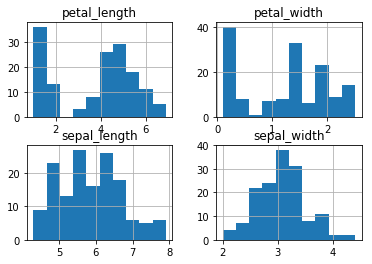

In [26]:
dataset.hist()
plt.show()

C:\Users\asus\Anaconda3\anacinst\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


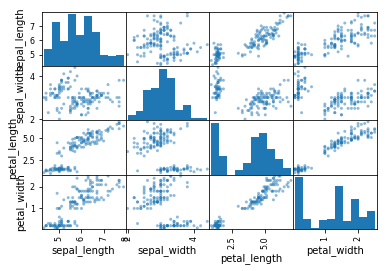

In [27]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()
#The diagonal grouping of some pairs of attributes. This suggests a high correlation 

In [28]:
# creating a validation set for the dataset
# Split-out validation dataset
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [29]:
# Test Harness : test options and evaluation metric
seed=7
scoring='accuracy'
# Using the metric of accuracy to evaluate models
# accuracy is the ratio of the number of correctly predicted instances divided by the total number of instances in the dataset *100 to give %

In [30]:
# Building Models
# Spot check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
# evaluate each model in turn 
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)




LR : 0.966667 (0.055277)
LDA : 0.983333 (0.033333)
KNN : 0.975000 (0.053359)
CART : 0.966667 (0.040825)
NB : 0.950000 (0.040825)
SVM : 0.983333 (0.033333)
